In [65]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# 1UBQ 단백질 구조를 읽어서 CB-CB contact map 계산 및 그리기

pdb_fn = "/public_data/tutorial/1UBQ.pdb"

In [66]:
# 1. PDB 파일 읽기 - ATOM 라인만 읽기, GLY은 CA 좌표값, 나머진 CB 좌표값
atom_records = []
with open(pdb_fn, 'r') as pdb_f:
    for line in pdb_f:
        if line.startswith('ATOM'):
            aa = line[17:20]
            atom_name = line[12:16].strip()
            x = float(line[32:38])
            y = float(line[40:46])
            z = float(line[48:54])
            #columns = line.split()
            if aa == 'GLY':
                if atom_name == 'CA':
                    atom_records.append(np.array([x, y, z]).reshape(1, 3))
            else:
                if atom_name == 'CB':
                    atom_records.append(np.array([x, y, z]).reshape(1, 3))

In [67]:
# 2. distance map 계산하기
num_atoms = len(atom_records)
distance_map = np.zeros((num_atoms, num_atoms))

for i in range(num_atoms):
    for j in range(i+1, num_atoms):
        euclidean_d = cdist(atom_records[i], atom_records[j], metric='euclidean')
        distance_map[i, j] = euclidean_d
        distance_map[j, i] = euclidean_d

In [68]:
# 3. contact map 변환하기 (Cb-Cb distance < 8.0A)
contact_map = np.zeros((num_atoms, num_atoms))
contact_map[distance_map < 8.0] = 1

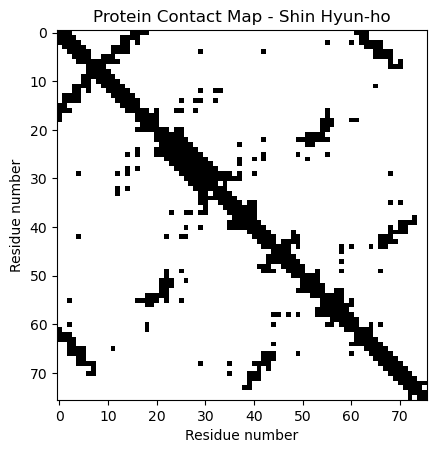

In [69]:
# 4. 그림으로 그리기 (matplotlib 이용)
plt.imshow(contact_map, cmap='binary', interpolation='none')
plt.title('Protein Contact Map - Shin Hyun-ho')
plt.xlabel('Residue number')
plt.ylabel('Residue number')
plt.show()